# Features:

1. age: Age of the patient

2. sex: Sex of the patient

3. cp: Chest pain type, 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

4. trtbps: Resting blood pressure (in mm Hg)

5. chol: Cholestoral in mg/dl fetched via BMI sensor

6. fbs: (fasting blood sugar > 120 mg/dl), 1 = True, 0 = False

7. restecg: Resting electrocardiographic results, 0 = Normal, 1 = ST-T wave normality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria

8. thalachh: Maximum heart rate achieved

9. oldpeak: Previous peak

10. slp: Slope

11. caa: Number of major vessels

12. thall: Thalium Stress Test result, (0-3)

13. exng: Exercise induced angina, 1 = Yes, 0 = No

14. output:  0 = less chance of heart attack, 1 = more chance of heart attack

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Loading the dataset (heart.csv)

In [2]:
data = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**I'm going to take copy of original data for visualization**

In [3]:
df1 = data.copy()

# Data Preprocessing

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df1.shape

(303, 14)

In [6]:
df1.duplicated().sum()

1

In [7]:
df1[df1.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
df1.drop_duplicates(inplace=True) # dropping duplicated rows
df1.reset_index(drop=True, inplace=True)
df1.shape

(302, 14)

In [9]:
df1.isnull().sum() # Checking null values

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

**Now, I'm going to change column values for better understanding**

In [10]:
df1['exng'] = df1['exng'].map({1:'yes',0:'no'})
df1['cp'] = df1['cp'].map({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})
df1['fbs'] = df1['fbs'].map({1:'true',0:'false'})
df1['restecg'] = df1['restecg'].map({0:'normal',1:'having ST-T wave abnormality',2:'showing probable or definite left ventricular hypertrophy'})
df1['output'] = df1['output'].map({0:'less chance of heart attack',1:'more chance of heart attack'})
df1.sample(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
152,64,1,asymptomatic,170,227,false,normal,155,no,0.6,1,0,3,more chance of heart attack
13,64,1,asymptomatic,110,211,false,normal,144,yes,1.8,1,0,2,more chance of heart attack
59,57,0,typical angina,128,303,false,normal,159,no,0.0,2,1,2,more chance of heart attack
236,60,1,typical angina,140,293,false,normal,170,no,1.2,1,2,3,less chance of heart attack
130,54,0,non-anginal pain,160,201,false,having ST-T wave abnormality,163,no,0.0,2,1,2,more chance of heart attack


# Correlation

<AxesSubplot:>

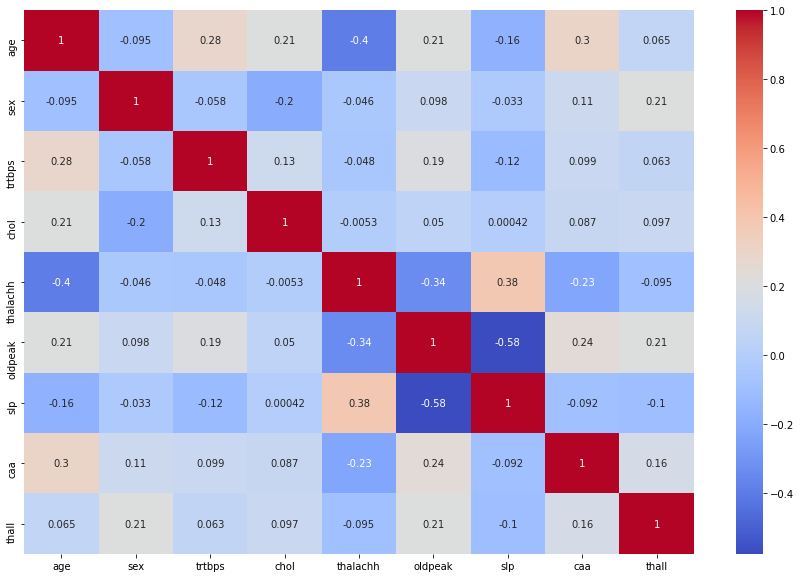

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm')

# Countplot

<AxesSubplot:title={'center':'Prevalence of Heart attack by thall'}, xlabel='output', ylabel='count'>

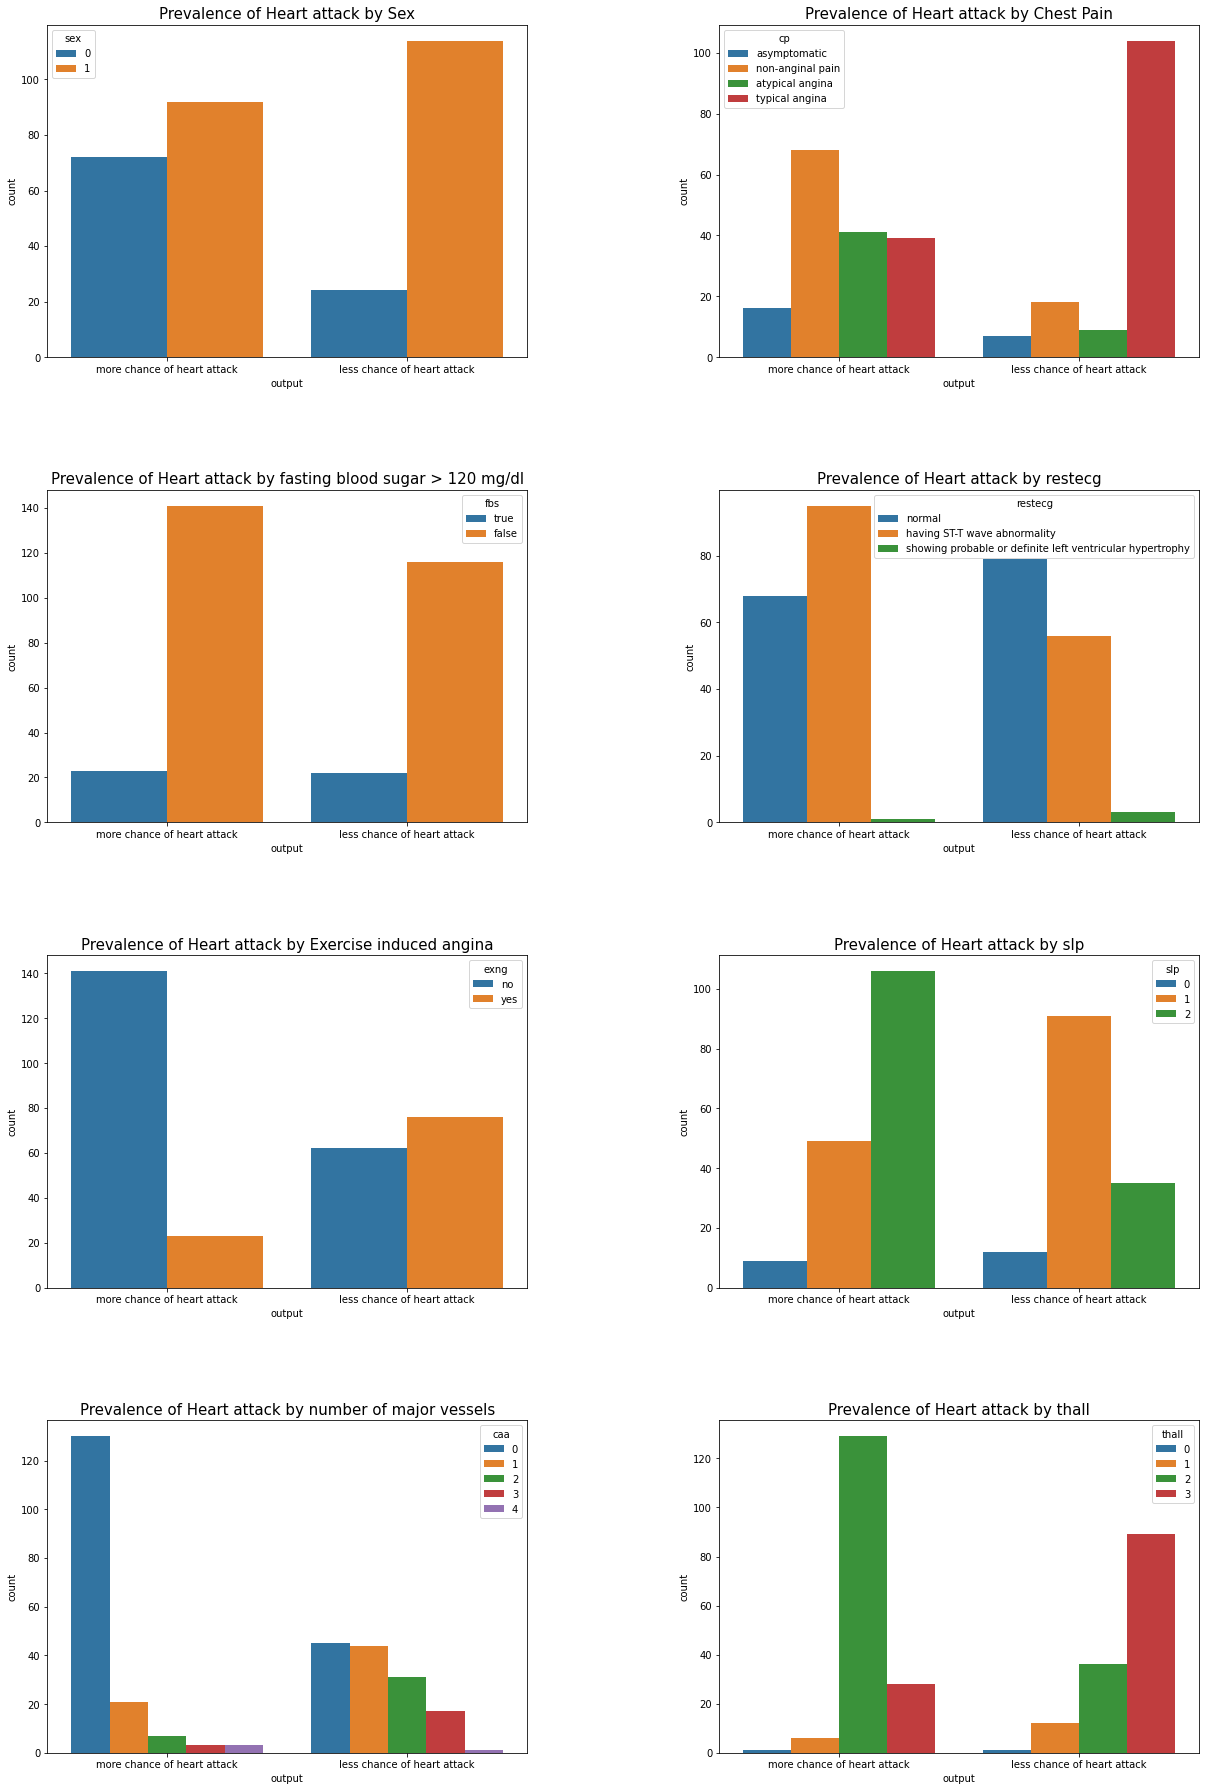

In [12]:
plt.figure(figsize=(20,30))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.subplot(4,2,1)
plt.title('Prevalence of Heart attack by Sex',fontsize=15)
sns.countplot(df1['output'], hue=df1['sex'])

plt.subplot(4,2,2)
plt.title('Prevalence of Heart attack by Chest Pain',fontsize=15)
sns.countplot(df1['output'], hue=df1['cp'])

plt.subplot(4,2,3)
plt.title('Prevalence of Heart attack by fasting blood sugar > 120 mg/dl',fontsize=15)
sns.countplot(df1['output'],hue=df1['fbs'])

plt.subplot(4,2,4)
plt.title('Prevalence of Heart attack by restecg',fontsize=15)
sns.countplot(df1['output'],hue = df1['restecg'])

plt.subplot(4,2,5)
plt.title('Prevalence of Heart attack by Exercise induced angina',fontsize=15)
sns.countplot(df1['output'],hue=df1['exng'])

plt.subplot(4,2,6)
plt.title('Prevalence of Heart attack by slp',fontsize=15)
sns.countplot(df1['output'],hue=df1['slp'])

plt.subplot(4,2,7)
plt.title('Prevalence of Heart attack by number of major vessels',fontsize=15)
sns.countplot(df1['output'],hue=df1['caa'])

plt.subplot(4,2,8)
plt.title('Prevalence of Heart attack by thall',fontsize=15)
sns.countplot(df1['output'],hue=df1['thall'])

# Distplot

<AxesSubplot:title={'center':'Prevalence of Heart attack by old peak'}, xlabel='oldpeak', ylabel='Count'>

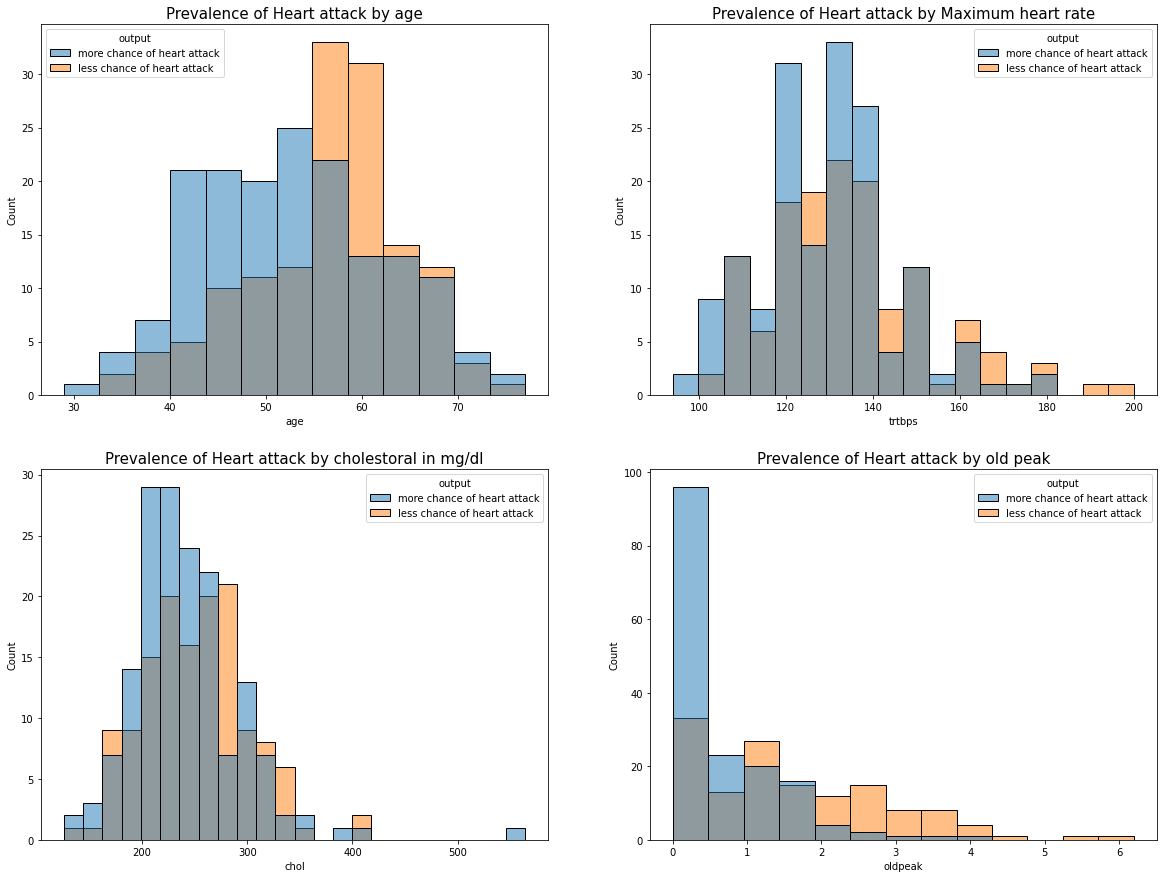

In [13]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Prevalence of Heart attack by age',fontsize=15)
sns.histplot(x = df1['age'], hue = df1['output'])

plt.subplot(2,2,2)
plt.title('Prevalence of Heart attack by Maximum heart rate',fontsize=15)
sns.histplot(x = df1['trtbps'], hue = df1['output'])

plt.subplot(2,2,3)
plt.title('Prevalence of Heart attack by cholestoral in mg/dl',fontsize=15)
sns.histplot(x = df1['chol'], hue = df1['output'])

plt.subplot(2,2,4)
plt.title('Prevalence of Heart attack by old peak',fontsize=15)
sns.histplot(x = df1['oldpeak'],hue = df1['output'])

# Jointplot

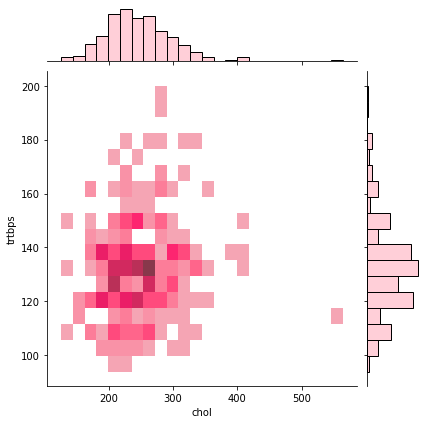

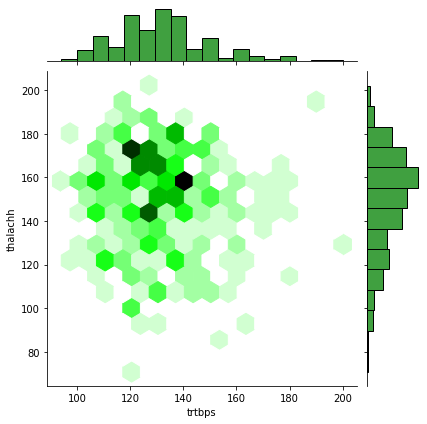

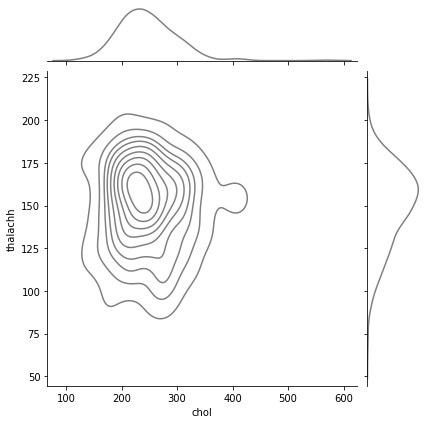

In [14]:
sns.jointplot(x = df1['chol'], y = df1['trtbps'], kind = 'hist',color = 'pink')
sns.jointplot(x = df1['trtbps'], y = df1['thalachh'], kind = 'hex', color = 'green')
sns.jointplot(x = df1['chol'], y = df1['thalachh'], kind = 'kde', color = 'grey')

# FacetGrid

<Figure size 1440x1440 with 0 Axes>

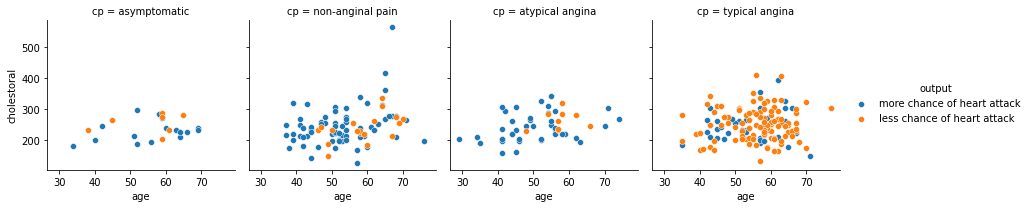

In [15]:
plt.figure(figsize = (20,20))
g = sns.FacetGrid(df1, col="cp", hue="output")
g.map(sns.scatterplot,'age','chol')
g.set_axis_labels('age', 'cholestoral')
g.add_legend()

# Lineplot & Regplot

<AxesSubplot:xlabel='age', ylabel='oldpeak'>

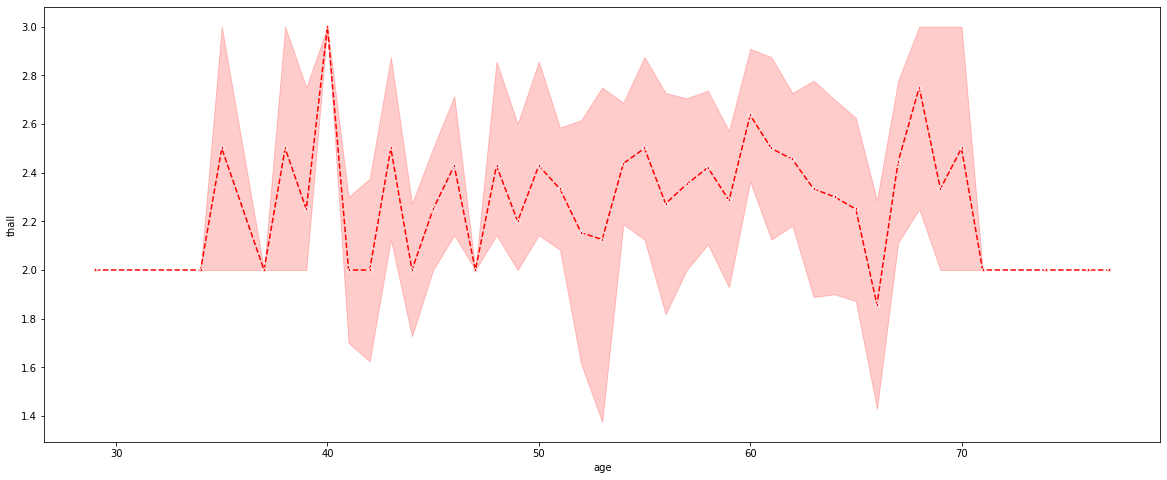

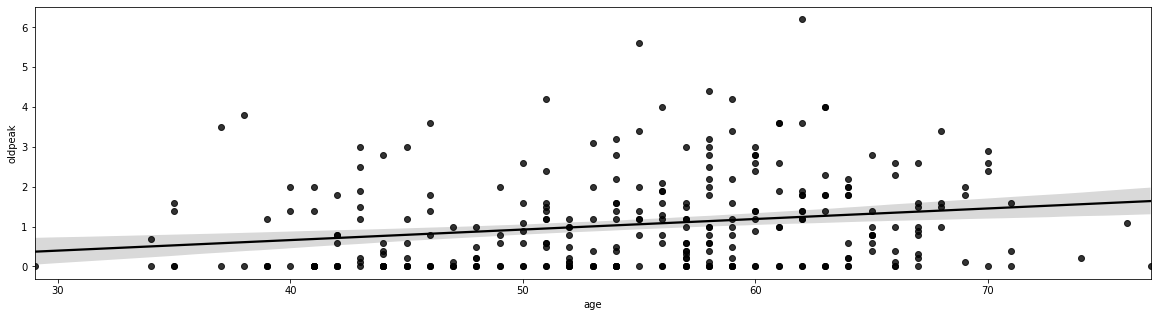

In [16]:
plt.figure(figsize=(20,8))
sns.lineplot(x = df1['age'], y = df1['thall'],marker = '*', linestyle = '--', color = 'red')

plt.figure(figsize = (20,5))
sns.regplot(x=df1['age'],y=df1['oldpeak'],color='black')

# Barplot & Boxplot

<AxesSubplot:xlabel='restecg', ylabel='age'>

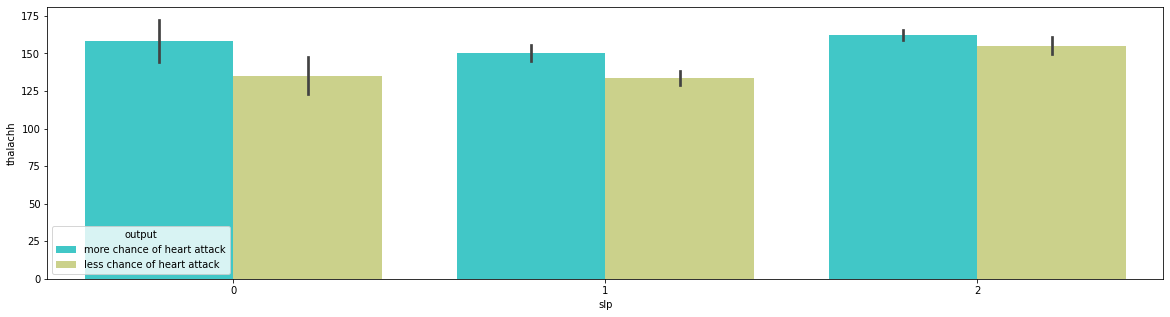

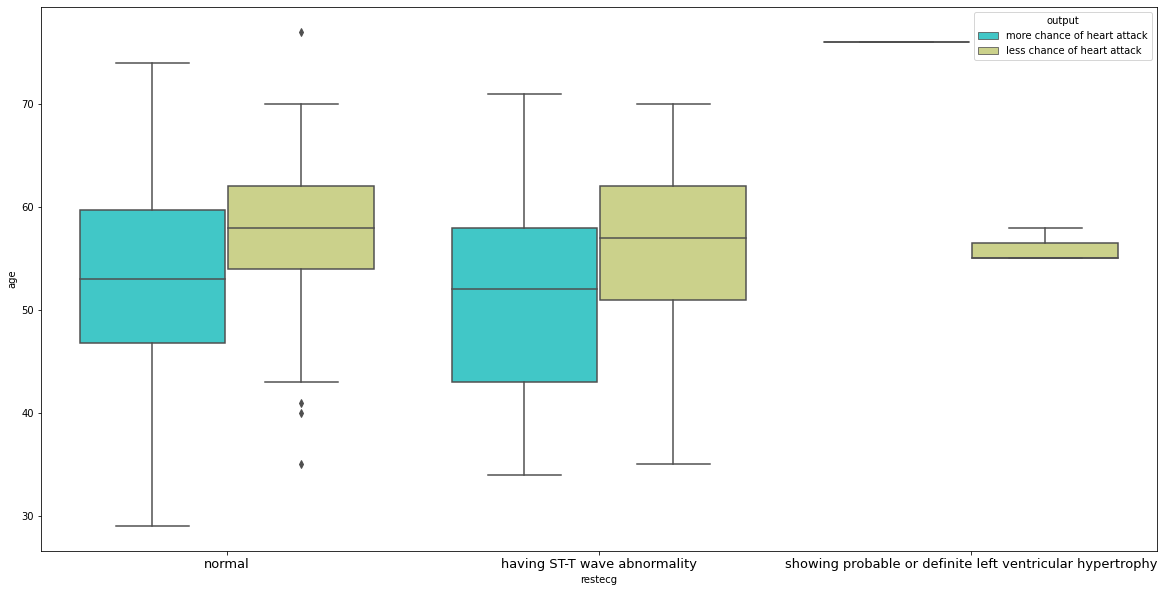

In [17]:
plt.figure(figsize = (20,5))
sns.barplot(x=df1['slp'],y=df1['thalachh'],hue=df1['output'],palette = 'rainbow')

plt.figure(figsize = (20,10))
plt.xticks(fontsize=13)
sns.boxplot(x=df1['restecg'],y=df1['age'],hue=df1['output'],palette = 'rainbow')

# Swarmplot

<AxesSubplot:xlabel='caa', ylabel='age'>

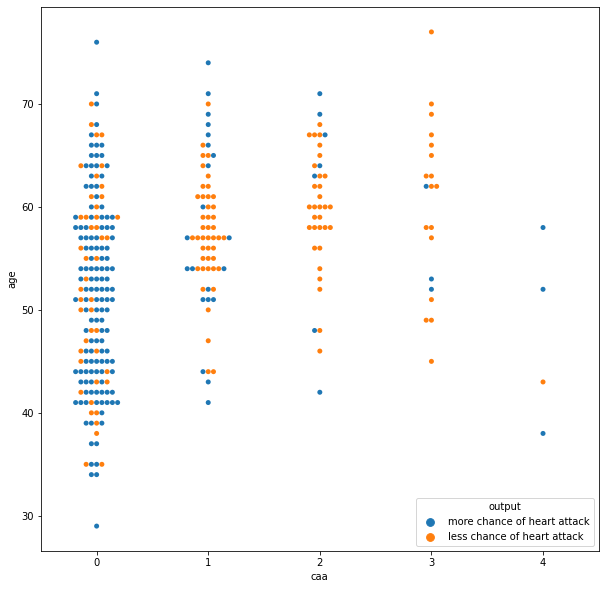

In [18]:
plt.figure(figsize = (10,10))
sns.swarmplot(x=df1['caa'],y=df1['age'],hue=df1['output'])

# Violinplot

<AxesSubplot:xlabel='thall', ylabel='age'>

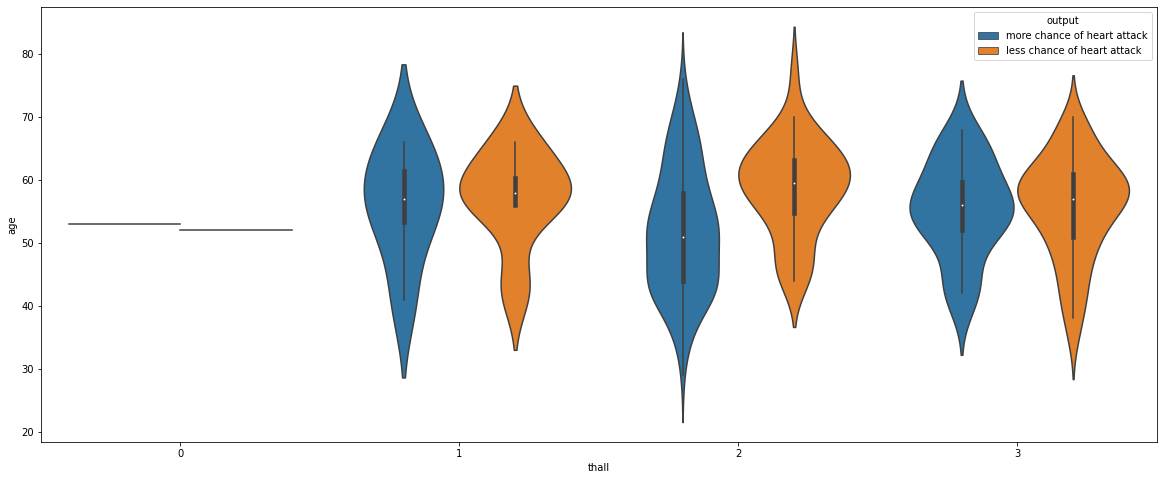

In [19]:
plt.figure(figsize = (20,8))
sns.violinplot(x=df1['thall'],y=df1['age'],hue=df1['output'])

## Conditions that leads to more chance of Heart Attack are:

* In general, 40 to 58 aged people have more chance of heart attack.

* Chest Pain - Non-anginal type

* Resting Blood Pressure - range of 120 to 140

* Cholesterol level - 200 to 260

* Electrocardiograph - having ST-T wave normality

* Maximum Heart Rate - above 150

* Slope - 2

* Number of major vessels - 0

* Thalium Stress Test Result - 2

* Old peak - between 0-0.5

# Prediction

Taking copy from Original Data

In [20]:
df2 = data.copy()
df2.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Dropping Duplicate values

In [21]:
df2.drop_duplicates(inplace=True)
df2.reset_index(drop=True, inplace=True)
df2.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [22]:
df2.reset_index(drop=True,inplace=True)
df2.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Now, I'm going to perform baseline modelling

In [23]:
x = df2.iloc[:, :-1].values
y = df2.iloc[:, -1].values

## Standardization

In [24]:
# Spliting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Machine Learning Models

In [26]:
key = ['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']
value = [LogisticRegression(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]
models = dict(zip(key,value))
print(models)

{'LogisticRegression': LogisticRegression(), 'KNeighborsClassifier': KNeighborsClassifier(), 'SVC': SVC(), 'DecisionTreeClassifier': DecisionTreeClassifier(), 'RandomForestClassifier': RandomForestClassifier()}


In [30]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.8688524590163934
KNeighborsClassifier 0.9180327868852459
SVC 0.9344262295081968
DecisionTreeClassifier 0.7868852459016393
RandomForestClassifier 0.8852459016393442


It shows SVC is the best fit for this dataset because the accuracy 93%. Let's try to increase the efficiency by Hyper tuning.

## Hyper tuning

In [32]:
svc = SVC(kernel = 'rbf',C = 1, degree = 5, random_state = 0)
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,svc_pred))
print("Confusion matrix:\n",confusion_matrix(y_test,svc_pred))

Accuracy: 0.9344262295081968
Confusion matrix:
 [[26  1]
 [ 3 31]]


The accuracy remains same.

## Visualizing Best fit model

<AxesSubplot:ylabel='Density'>

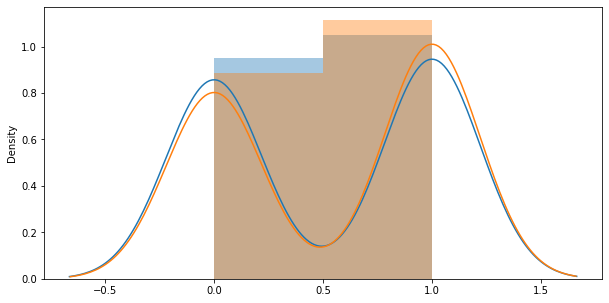

In [33]:
plt.figure(figsize = (10,5))
sns.distplot(svc_pred, label = 'Predicted')
sns.distplot(y_test, label = 'Actual')

**Hope you like my work. Please upvote me if you like it and leave your feedback in comments. Share this to your friends. Thanks for viewing this.**